# Regionale Unterscchiede der Lebensqualität in Nordbayern

Diese Notebook zeigt ausgewählte regionale Unterschiede der Lebensqualität in Nordbayern anhand von drei Indikatoren aus der INKAR-Datenbank:

-**Medianeinkommen pro Monat** (wirtschaftliche Lage)
-**Schulabgänger ohne Abschluss** (soziale / bildungsbezogene Risiken)
-**Krankenhausbetten je 10000 Einwohner** (medizinische Versorgung)

Die Visualisierungen konzentrieren sich auf Kreise und kreisfreie Städte und dienen als Grundlage für die Interpretation für die begleitende Präsentation.

In [1]:
nordbayern_kreise = [
    #Oberfranken
    "Bamberg", "Bayreuth", "Coburg", "Hof",
    "Bamberg, Landkreis", "Bayreuth, Landkreis",
    "Coburg, Landkreis", "Forchheim", "Hof, Landkreis",
    "Kronach", "Kulmbach", "Lichtenfels", "Wunsiedel i. Fichtelgebirge",

    #Mittelfranken
    "Ansbach", "Erlangen", "Fürth", "Nürnberg", "Schwabach",
    "Ansbach, Landkreis", "Erlangen-Höchstadt",
    "Fürth, Landkreis", "Neustadt a.d. Aisch-Bad Windsheim",
    "Nürnberger Land", "Roth", "Weißenburg-Gunzenhausen",

    #Unterfranken
    "Aschaffenburg", "Schweinfurt", "Würzburg",
    "Aschaffenburg, Landkreis", "Bad Kissingen",
    "Haßberge", "Kitzingen", "Main-Spessart", 
    "Miltenberg", "Rhön-Grabfeld",
    "Schweinfurt, Landkreis", "Würzburg, Landkreis"

]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_income = pd.read_excel("../data/medianeinkommen.xls")
df_income.head()

df_income = df_income.rename(columns={
    "Raumeinheit": "Kreis",
    df_income.columns[-1]: "Medianeinkommen"
})

df_income_nb = df_income[df_income["Kreis"].isin(nordbayern_kreise)].copy()
df_income.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Kennziffer,Kreis,Aggregat,Medianeinkommen
0,NaN,NaN,NaN,2023.00
1,9161.0,Ingolstadt,Kreise,5636.72
2,9162.0,"München, Landeshauptstadt",Kreise,5094.18
3,9163.0,"Rosenheim, Stadt",Kreise,3884.83
4,9171.0,Altötting,Kreise,4147.80


In [3]:
kreisfreie_staedte_nb = [
    "Ansbach", "Aschaffenburg", "Bamberg", "Bayreuth",
    "Coburg", "Erlangen", "Fürth", "Hof",
    "Nürnberg", "Schwabach", "Schweinfurt", "Würzburg"
]

In [4]:
df_income_nb = df_income_nb.copy()

df_income_nb["Raumtyp"] = df_income_nb["Kreis"].apply(
    lambda x: "Kreisfreie Stadt" if x in kreisfreie_staedte_nb else "Landkreis"
)

df_income_nb_sorted = df_income_nb.sort_values("Medianeinkommen", ascending=True)


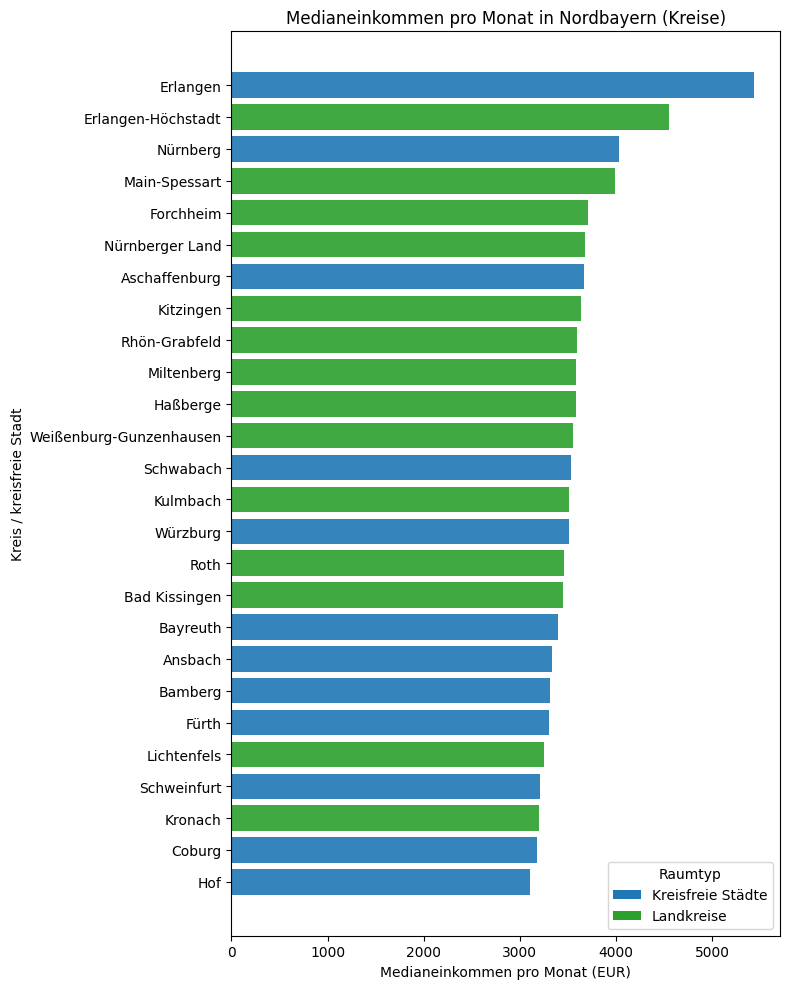

In [5]:
from matplotlib.patches import Patch

plt.figure(figsize=(8, 10))

colors = df_income_nb_sorted["Raumtyp"].map({
    "Kreisfreie Stadt": "#1f77b4",  # blau
    "Landkreis": "#2ca02c"          # grün
})

plt.barh(
    df_income_nb_sorted["Kreis"],
    df_income_nb_sorted["Medianeinkommen"],
    color=colors,
    alpha=0.9
)

plt.xlabel("Medianeinkommen pro Monat (EUR)")
plt.ylabel("Kreis / kreisfreie Stadt")
plt.title("Medianeinkommen pro Monat in Nordbayern (Kreise)")

# 👇 EXPLIZITE Legende
legend_elements = [
    Patch(facecolor="#1f77b4", label="Kreisfreie Städte"),
    Patch(facecolor="#2ca02c", label="Landkreise")
]

plt.legend(
    handles=legend_elements,
    title="Raumtyp",
    loc="lower right"
)

plt.tight_layout()
plt.show()


In [6]:
df_edu = pd.read_excel("../data/ohne_abschluss.xls")
df_edu.head()

df_edu = df_edu.rename(columns={
    "Raumeinheit": "Kreis",
    df_edu.columns[-1]: "Schulabgaenger_ohne_Abschluss"
})

df_edu.head()

df_edu_nb = df_edu[df_edu["Kreis"].isin(nordbayern_kreise)]
df_edu_nb.shape

df_scatter = pd.merge(
    df_income_nb,
    df_edu_nb,
    on="Kreis",
    how="inner"
)

df_scatter.head()


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Kennziffer_x,Kreis,Aggregat_x,Medianeinkommen,Raumtyp,Kennziffer_y,Aggregat_y,Schulabgaenger_ohne_Abschluss
0,9471.0,Bamberg,Kreise,3315.60,Kreisfreie Stadt,9471.0,Kreise,8.52
1,9472.0,Bayreuth,Kreise,3399.90,Kreisfreie Stadt,9472.0,Kreise,5.49
2,9473.0,Coburg,Kreise,3175.19,Kreisfreie Stadt,9473.0,Kreise,11.67
3,9474.0,Forchheim,Kreise,3708.63,Landkreis,9474.0,Kreise,3.50
4,9475.0,Hof,Kreise,3108.92,Kreisfreie Stadt,9475.0,Kreise,6.90


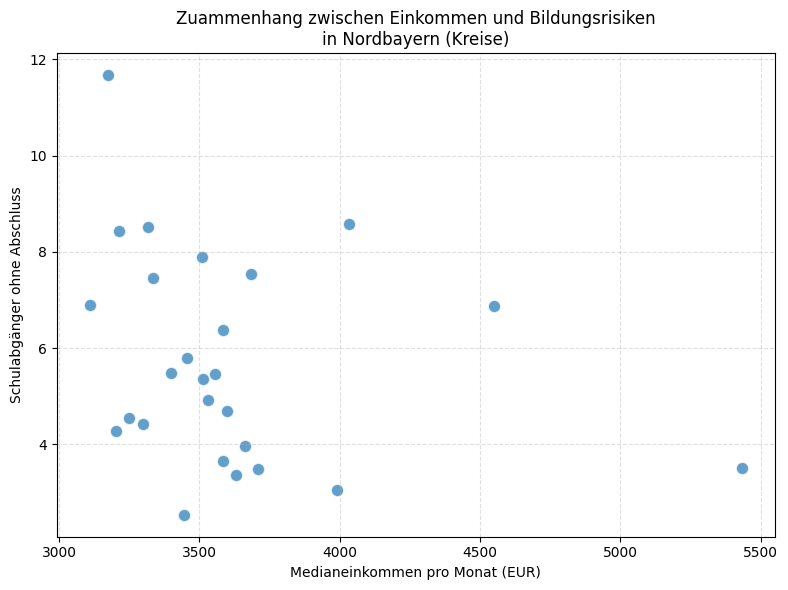

In [7]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df_scatter["Medianeinkommen"],
    df_scatter["Schulabgaenger_ohne_Abschluss"],
    color="#1f77b4",
    alpha=0.7,
    edgecolor="white",
    s=80
)

plt.xlabel("Medianeinkommen pro Monat (EUR)")
plt.ylabel("Schulabgänger ohne Abschluss")
plt.title("Zuammenhang zwischen Einkommen und Bildungsrisiken\nin Nordbayern (Kreise)")

plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [8]:
df_beds = pd.read_excel("../data/krankenhausbetten.xls")
df_beds.head()

df_beds = df_beds.rename(columns={
    "Raumeinheit": "Kreis",
    df_beds.columns[-1]: "Krankenhausbetten_je_1000"
})

df_beds[["Kreis", "Krankenhausbetten_je_1000"]].head()

df_beds_nb = df_beds[df_beds["Kreis"].isin(nordbayern_kreise)].copy()
df_beds_nb.shape


df_beds_nb["Raumtyp"] = df_beds_nb["Kreis"].apply(
    lambda x: "Kreisfreie Stadt" if x in kreisfreie_staedte_nb else "Landkreis"
)

df_beds_nb[["Kreis", "Raumtyp", "Krankenhausbetten_je_1000"]].head()

df_beds_grouped = (
    df_beds_nb
    .groupby("Raumtyp")["Krankenhausbetten_je_1000"]
    .mean()
    .reset_index()
)

df_beds_grouped



WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Raumtyp,Krankenhausbetten_je_1000
0,Kreisfreie Stadt,3.929167
1,Landkreis,5.215714


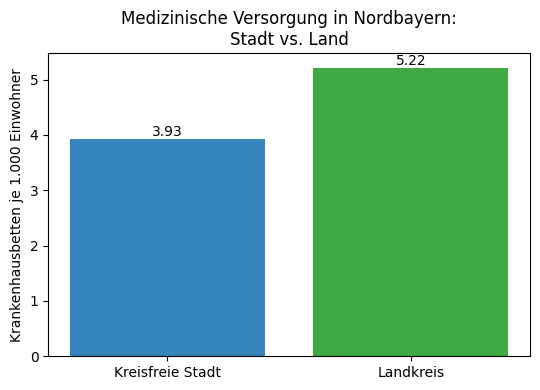

In [9]:
plt.figure(figsize=(5.5, 4))

bars = plt.bar(
    df_beds_grouped["Raumtyp"],
    df_beds_grouped["Krankenhausbetten_je_1000"],
    color=["#1f77b4", "#2ca02c"],
    alpha=0.9
)

plt.ylabel("Krankenhausbetten je 1.000 Einwohner")
plt.xlabel("")
plt.title("Medizinische Versorgung in Nordbayern:\nStadt vs. Land")

for b in bars: 
    y = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, y, f"{y:.2f}", ha="center", va="bottom")

 
plt.tight_layout()
plt.show()   